https://mp.weixin.qq.com/s?__biz=MzIwOTc2MTUyMg==&mid=2247496583&idx=3&sn=1313d3f3910a309ec6fa562265b979aa&chksm=976c561aa01bdf0c16f8556d7c6c253c006a85e7cf7959b61fdf224c1823b3fda38a7df352ee&scene=21#wechat_redirect

### 1.1 静态连续变量

##### 1.1.1 离散化

In [15]:
# 1.1.1.1 二值化

In [16]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

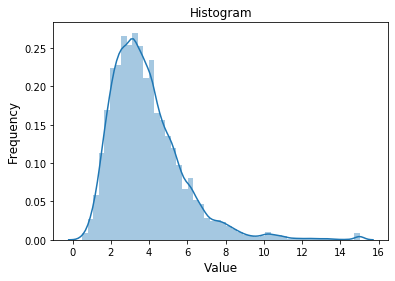

In [17]:
dataset = fetch_california_housing()
X,y = dataset.data,dataset.target
fig,ax = plt.subplots()
sns.distplot(X[:,0],hist=True,kde=True)
ax.set_title('Histogram', fontsize=12)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [21]:
from sklearn.preprocessing import Binarizer
sample_columns = X[0:10,0]
# print(sample_columns.reshape(-1,1))
model = Binarizer(threshold=6)
result = model.fit_transform(sample_columns.reshape(-1,1)).reshape(-1)
print(result)

[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
# 1.1.1.2 分箱
from sklearn.preprocessing import KBinsDiscretizer
test_set = X[0:10,0]
train_set = X[10:,0]
model = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')
model.fit(train_set.reshape(-1,1))
result = model.transform(test_set.reshape(-1,1)).reshape(-1)
bin_dege = model.bin_deges_[0]

ImportError: cannot import name 'KBinsDiscretizer'